In [1]:
#install snscrape package to use to scrape Twitter posts

!pip install -q snscrape

In [2]:
#import snscrape module twitter and pandas library

import snscrape.modules.twitter as sntwitter
import pandas as pd


In [15]:
#assign a blank list cv_tweets and append tweet.date, tweet.id, tweet.content for a maximum of 500 tweets for the keyword coronavirius from 26-22-2021 to 06-12-2021

cv_tweets = []

# Scraping data and append tweets to list
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('coronavirus since:2021-11-26 until:2021-12-06').get_items()):
    cv_tweets.append([tweet.date, tweet.id, tweet.content])
    if i > 500:
        break
#Code adapted from (Singh, 2021). 

In [16]:
# Creating the dataframe, Export .csv file
cv_df = pd.DataFrame(cv_tweets, columns=['Datetime', 'Tweet Id', 'Text'])
cv_df.to_csv('coronavirus.csv')

In [ ]:
#Data preprocessing and cleaning 

In [17]:
!pip install tweet-preprocessor

In [18]:
#import libraries needed for processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import preprocessor as p

In [190]:
#read data frame back into coding environment
df1 = pd.read_csv('coronavirus.csv',lineterminator='\n')
df1

,Unnamed: 0,Datetime,Tweet Id,Text\r
0,0,2021-12-05 23:59:58+00:00,1467644950930071555,Donald Trump was an unmitigated disaster on Co...
1,1,2021-12-05 23:59:56+00:00,1467644940792565762,@BoxOMoxy @benjiwoofwoof2 @1stLadyMorticia @FL...
2,2,2021-12-05 23:59:52+00:00,1467644924539584519,Seven Days: Following Trump’s Reckless Coronav...
3,3,2021-12-05 23:59:50+00:00,1467644919074406404,El Ministerio de Salud informó que tres person...
4,4,2021-12-05 23:59:43+00:00,1467644887625605133,@hnsbroker coronavirus/ for sale - DM offers f...
...,...,...,...,...
497,497,2021-12-05 23:11:16+00:00,1467632696302186498,*Hackean celulares de funcionarios de EU con t...
498,498,2021-12-05 23:11:08+00:00,1467632663041384456,How #antivaxxers🤡sound to the rest of us. #vax...
499,499,2021-12-05 23:11:07+00:00,1467632656544370691,Todos los enigmas que tiene la ciencia sobre l...
500,500,2021-12-05 23:11:06+00:00,1467632654761746434,@KremlinRussia_E 5.12.2021 da ROSALBA PAU Mini...


In [191]:
#drop columns "Tweet Id" and "Unnamed: 0"
df2 = df1.drop(["Tweet Id","Unnamed: 0"], axis=1)

In [192]:
#Function for preprocessing of tweets
def preprocess_tweet(text):
    text = p.clean(text)
    return text
#Function used from (Singh, 2021). 


In [193]:
#run df2 into cleaning function
df2['Clean Text'] = df2['Text\r'].apply(preprocess_tweet)
df2['Clean Text']= df2['Clean Text'].str.replace('[^\w\s]','')

In [194]:
# Covert Datetime column type 
df2["Datetime"] = pd.to_datetime(df2["Datetime"]) 

In [195]:
#remove duplicate rows
df2.drop_duplicates(inplace=True) 


In [196]:
# Print the info again
print(df2.info()) #there were no duplicate rows 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 0 to 501
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Datetime    502 non-null    datetime64[ns, UTC]
       502 non-null    object             
 2   Clean Text  502 non-null    object             
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 15.7+ KB
None


In [197]:
#remove stop words using natural language toolkit e.g. “I”, “me”, “my”, “myself”, “we”, “our”, “ours”, etc. Code adapted from https://helloml.org/performing-sentiment-analysis-on-tweets-using-python/
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
#Code used from (Singh, 2021). 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [199]:
#apply stopwords function for english to this dataframe of tweets
df2['Clean Text'] = df2['Clean Text'] .apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#Code adapted from (Keiku, 2017). 

In [200]:
#print df2 to ensure cleaning of text has worked
df2

,Datetime,Text\r,Clean Text
0,2021-12-05 23:59:58+00:00,Donald Trump was an unmitigated disaster on Co...,donald trump unmitigated disaster covidand ame...
1,2021-12-05 23:59:56+00:00,@BoxOMoxy @benjiwoofwoof2 @1stLadyMorticia @FL...,actual charlie brown christmas tree stays year...
2,2021-12-05 23:59:52+00:00,Seven Days: Following Trump’s Reckless Coronav...,seven days following trumps reckless coronavir...
3,2021-12-05 23:59:50+00:00,El Ministerio de Salud informó que tres person...,el ministerio de salud inform que tres persona...
4,2021-12-05 23:59:43+00:00,@hnsbroker coronavirus/ for sale - DM offers f...,coronavirus sale dm offers consideration
...,...,...,...
497,2021-12-05 23:11:16+00:00,*Hackean celulares de funcionarios de EU con t...,hackean celulares de funcionarios de eu con te...
498,2021-12-05 23:11:08+00:00,How #antivaxxers🤡sound to the rest of us. #vax...,rest us
499,2021-12-05 23:11:07+00:00,Todos los enigmas que tiene la ciencia sobre l...,todos los enigmas que tiene la ciencia sobre l...
500,2021-12-05 23:11:06+00:00,@KremlinRussia_E 5.12.2021 da ROSALBA PAU Mini...,da rosalba pau ministro italiana ruolo sindaca...


In [202]:
import re
def process_tweets(tweet):
    
    # Remove links
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    
    # Remove mentions and hashtag
    tweet = re.sub(r'\@\w+|\#','', tweet)
    
    # Tokenize the words
    tokenized = word_tokenize(tweet)

    # Remove the stop words
    tokenized = [token for token in tokenized if token not in stopwords.words("english")] 

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokenized = [lemmatizer.lemmatize(token, pos='a') for token in tokenized]

    # Remove non-alphabetic characters and keep the words contains three or more letters
    tokenized = [token for token in tokenized if token.isalpha() and len(token)>2]
    
    return tokenized
    
# Call the function and store the result into a new column
df2['Clean Text'] = df2['Clean Text'].str.lower().apply(process_tweets)

# Print the first fifteen rows of Processed
display(df2['Clean Text'].head(15))
#Code used from (Hasdemir, 2020). 

0     [donald, trump, unmitigated, disaster, covidan...
1     [actual, charlie, brown, christmas, tree, stay...
2     [seven, days, following, trumps, reckless, cor...
3     [ministerio, salud, inform, que, tres, persona...
4            [coronavirus, sale, offers, consideration]
5         [cant, wait, stevie, ethical, laser, pointer]
6     [seven, days, following, trumps, reckless, cor...
7     [coronavirus, puebla, crecen, los, contagios, ...
8                                      [chewy, awesome]
9     [maternal, morbidities, outcomes, pregnant, wo...
10    [seven, days, following, trumps, reckless, cor...
11    [encouraging, early, feedback, omicron, severi...
12                  [pickle, finished, puzzle, finally]
13    [nope, wtf, knows, thats, coming, chewy, order...
14    [dondocas, das, grifes, quer, usar, mscara, do...
Name: Clean Text, dtype: object

In [279]:
#EDA
#print the shape of the data
print("Shape of data=>",df2.shape)

Shape of data=> (502, 3)


In [280]:
#null values in dataset
df2.isnull().sum()

Datetime      0
Text\r        0
Clean Text    0
dtype: int64

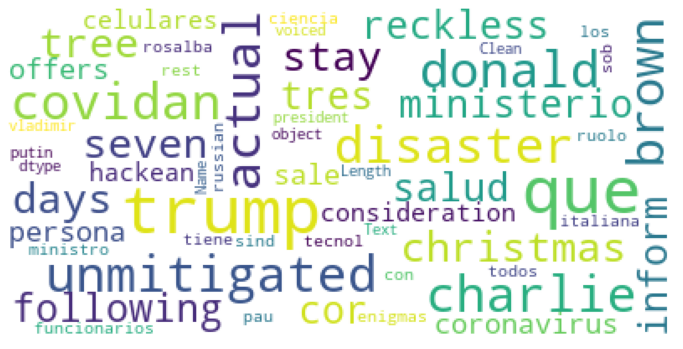

In [281]:
#demonstrating wordcloud on variations of words in Clean Test column 
import matplotlib as mpl
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=100
                         ).generate(str(df2['Clean Text']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [ ]:
#Performing Sentiment Analysis with VADER 

In [30]:
nltk.download('vader_lexicon') # Download the VADER lexicon
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [32]:
#Code apapted from (Singh, 2021). 

# Initialize sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Obtaining NLTK scores
df2['VScore'] = df2['Clean Text'].apply(lambda x: sia.polarity_scores(x))

# Obtaining NLTK compound score
df2['VComp'] = df2['VScore'].apply(lambda score_dict: score_dict['compound'])

# Set threshold to define neutral sentiment
neutral_thresh = 0.05

# Categorize scores into the sentiments of positive, neutral or negative
df2['Sentiment'] = df2['VComp'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

In [ ]:
#Generally, VADER is better for predicting sentiments for social network data, but as we need to establish the trends which data shows, we will use both the models and then compare the results. TextBlob gives us a polarity score, which helps us to classify sentiments. Similarly, VADER also gives a compound score, which is used to set classification labels.

#We set VADER compound score’s neutral threshold to be 0.05. Hence, we will use the following rule to classify sentiments:

#If -0.05 <= score <= 0.05: Tweet is of neutral sentiment.
#If -0.05 > score: Tweet is of negative sentiment.
#If 0.05 < score: Tweet is of positive sentiment.

#https://helloml.org/performing-sentiment-analysis-on-tweets-using-python/

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text major ticklabel objects>)

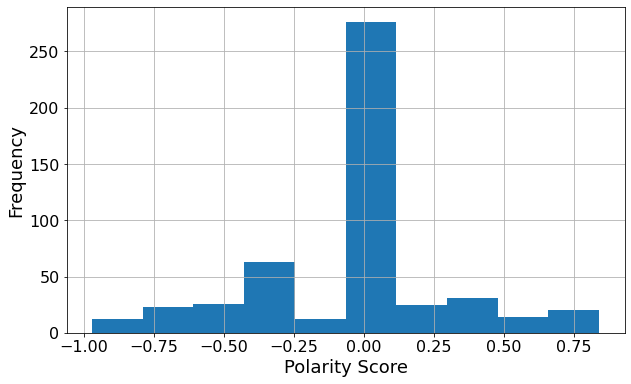

In [33]:
#examining polarity 
#Now, that we have assigned Sentiments to our tweets, we will plot a histogram/frequency plot of polarity scores to better understand the distribution of tweets among sentiment categories.
fig = plt.figure(figsize=(10, 6))
df2['VComp'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [34]:
#look at the percentage of tweets across all sentiment categories.
def get_value_counts(col_name):
    count = pd.DataFrame(df2[col_name].value_counts())
    percentage = pd.DataFrame(df2[col_name].value_counts(normalize=True).mul(100))
    value_counts_df = pd.concat([count, percentage], axis = 1)
    value_counts_df = value_counts_df.reset_index()
    value_counts_df.columns = ['sentiment', 'counts', 'percentage']
    value_counts_df.sort_values('sentiment', inplace = True)
    value_counts_df['percentage'] = value_counts_df['percentage'].apply(lambda x: round(x,2))
    value_counts_df = value_counts_df.reset_index(drop = True)
    return value_counts_df
vader_sentiment_df = get_value_counts('Sentiment')
vader_sentiment_df

,sentiment,counts,percentage
0,Negative,139,27.69
1,Neutral,271,53.98
2,Positive,92,18.33


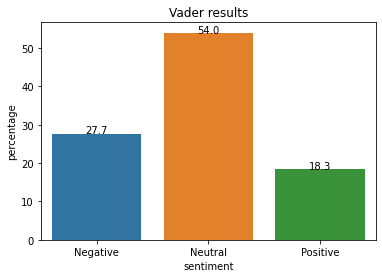

In [37]:
#plot percentages of sentiment in frequency plot 
ax = sns.barplot(x="sentiment", y="percentage", data=vader_sentiment_df)
ax.set_title('Vader results')

for index, row in vader_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

In [ ]:
#though most of posts are neutral, this may also be due to some posts not being in english and therefore not being able to be classified into a negative or positive group.

In [39]:
# creating a dict file to assign a number to each 
sentiment = {'Positive': 1,'Neutral': 3, 'Negative': 0}
#Code adapted from (Geek for Geeks, 2018). 

In [40]:
# Looping through data frame to change all sentiment names to a Sentiment Number based on dictionary defined above
df2.Sentiment = [sentiment[item] for item in df2.Sentiment]
print(df2) 
#Code adapted from (Geek for Geeks, 2018). 

                     Datetime  \
0   2021-12-05 23:59:58+00:00   
1   2021-12-05 23:59:56+00:00   
2   2021-12-05 23:59:52+00:00   
3   2021-12-05 23:59:50+00:00   
4   2021-12-05 23:59:43+00:00   
..                        ...   
497 2021-12-05 23:11:16+00:00   
498 2021-12-05 23:11:08+00:00   
499 2021-12-05 23:11:07+00:00   
500 2021-12-05 23:11:06+00:00   
501 2021-12-05 23:11:02+00:00   

                                                Text\r  \
0    Donald Trump was an unmitigated disaster on Co...   
1    @BoxOMoxy @benjiwoofwoof2 @1stLadyMorticia @FL...   
2    Seven Days: Following Trump’s Reckless Coronav...   
3    El Ministerio de Salud informó que tres person...   
4    @hnsbroker coronavirus/ for sale - DM offers f...   
..                                                 ...   
497  *Hackean celulares de funcionarios de EU con t...   
498  How #antivaxxers🤡sound to the rest of us. #vax...   
499  Todos los enigmas que tiene la ciencia sobre l...   
500  @KremlinRussia_E 5

In [41]:
#Drop all Neutral values in Sentiment column 
df3 = df2[df2.Sentiment != 3]

In [46]:
#select only Clean Text and Sentiment Columns in a data frame
d4=df3[['Clean Text','Sentiment']]

In [49]:
#seperating feature and target variable 
X=d4['Clean Text']
y=d4['Sentiment']

In [59]:
# Separating the 95% data for training data and 5% for testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)
#Code adapted from (Goyal, 2021).

In [60]:
#transforming data based on TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))
#Code adapted from (Goyal, 2021).

No. of feature_words:  4263


In [61]:
#apply TfidfVectorizer to x_train and x_test
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
#Code adapted from (Goyal, 2021).

In [62]:
#Evaluate Model 
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
#Code used from (Goyal, 2021).    

In [63]:
#using Bernoulli Naive Bayes, a simple model classifier 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import BernoulliNB
#Code used from (Goyal, 2021). 

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.33      0.50         3

    accuracy                           0.83        12
   macro avg       0.91      0.67      0.70        12
weighted avg       0.86      0.83      0.80        12



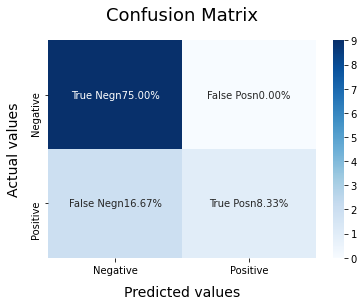

In [65]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)
#Code used from (Goyal, 2021). 

In [142]:
#To install wordcloud build a wordcloud
!pip install wordcloud

In [143]:
from wordcloud import WordCloud #impott wordcloud library

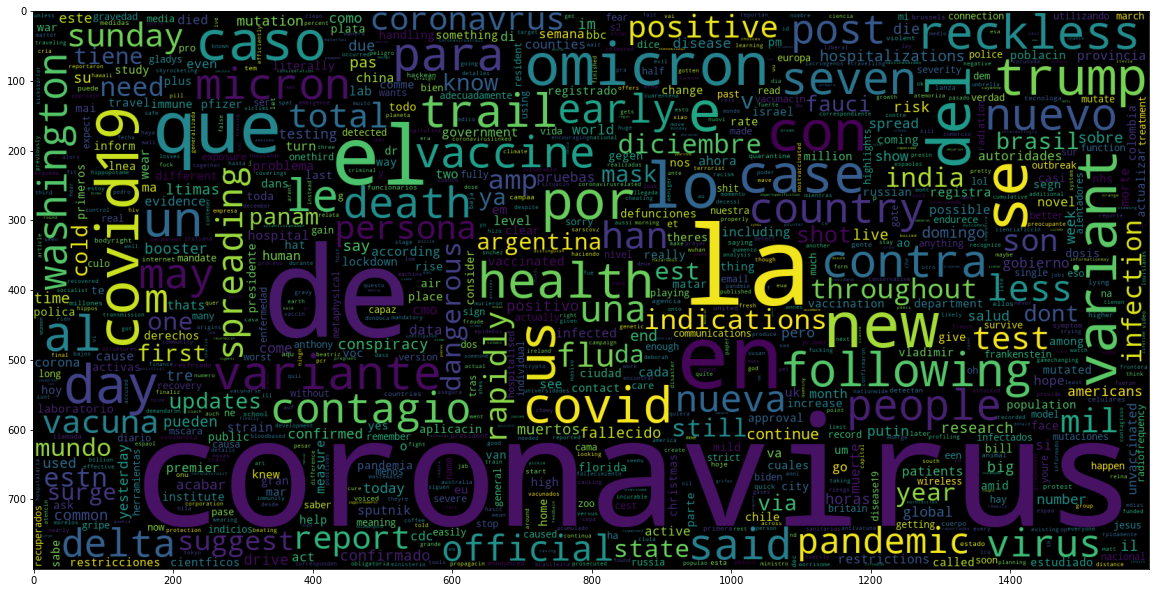

In [149]:
#Investigate all negatively classed words
data_neg = df2['Clean Text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
#Code used from (Goyal, 2021). 
#Many of these negatively classes words are expected- such as Omicron, positive, coronavirus, trip, reckless, death, flu etc.

In [ ]:
#LDA analysis

In [208]:
from nltk.probability import FreqDist

#iterate through each tweet, then each token in each tweet, and store in one list
flat_words = [item for sublist in df2['Clean Text'] for item in sublist]

word_freq = FreqDist(flat_words)

word_freq.most_common(30)
#Code apadated (Zifchak, 2020). 

[('coronavirus', 355),
 ('que', 70),
 ('las', 45),
 ('omicron', 44),
 ('del', 44),
 ('new', 41),
 ('con', 39),
 ('los', 38),
 ('por', 37),
 ('variant', 35),
 ('cases', 33),
 ('casos', 32),
 ('days', 31),
 ('covid', 31),
 ('health', 30),
 ('trumps', 28),
 ('following', 27),
 ('reckless', 27),
 ('para', 27),
 ('trail', 26),
 ('variante', 26),
 ('seven', 25),
 ('contra', 25),
 ('micron', 22),
 ('said', 22),
 ('nuevos', 20),
 ('may', 20),
 ('people', 20),
 ('contagios', 19),
 ('washington', 18)]

In [209]:
#retrieve word and count from FreqDist tuples

most_common_count = [x[1] for x in word_freq.most_common(30)]
most_common_word = [x[0] for x in word_freq.most_common(30)]

#create dictionary mapping of word count
top_30_dictionary = dict(zip(most_common_word, most_common_count))
#Code apadated (Zifchak, 2020).

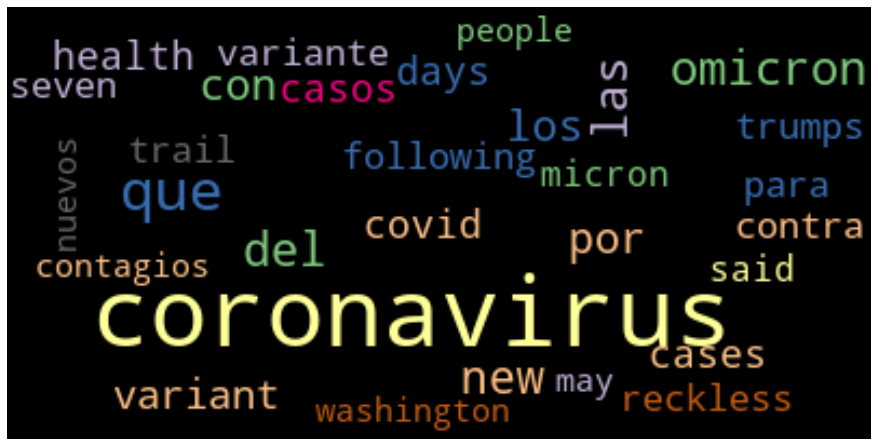

In [210]:
from wordcloud import WordCloud

#Create Word Cloud of top 30 words
wordcloud = WordCloud(colormap = 'Accent', background_color = 'black')\
.generate_from_frequencies(top_30_dictionary)

#plot with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('top_30_cloud.png')

plt.show()
#Code apadated (Zifchak, 2020).

In [213]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [214]:
import gensim
from gensim.corpora import Dictionary

#create dictionary
text_dict = Dictionary(df2['Clean Text'])

#view integer mappings
text_dict.token2id
#Code apadated (Zifchak, 2020).

{'americans': 0,
 'antivax': 1,
 'bad': 2,
 'bidens': 3,
 'caving': 4,
 'choices': 5,
 'coronavirus': 6,
 'covidand': 7,
 'despite': 8,
 'died': 9,
 'disaster': 10,
 'donald': 11,
 'joe': 12,
 'lifetime': 13,
 'nuts': 14,
 'one': 15,
 'political': 16,
 'trump': 17,
 'unmitigated': 18,
 'vaccinesbiden': 19,
 'watch': 20,
 'actual': 21,
 'brown': 22,
 'charlie': 23,
 'christmas': 24,
 'round': 25,
 'stays': 26,
 'tree': 27,
 'year': 28,
 'coronavirustrail': 29,
 'days': 30,
 'following': 31,
 'reckless': 32,
 'seven': 33,
 'trumps': 34,
 'argentina': 35,
 'con': 36,
 'fueron': 37,
 'horas': 38,
 'inform': 39,
 'las': 40,
 'ltimas': 41,
 'ministerio': 42,
 'murieron': 43,
 'personas': 44,
 'que': 45,
 'reportadas': 46,
 'salud': 47,
 'tres': 48,
 'consideration': 49,
 'offers': 50,
 'sale': 51,
 'cant': 52,
 'ethical': 53,
 'laser': 54,
 'pointer': 55,
 'stevie': 56,
 'wait': 57,
 'post': 58,
 'trail': 59,
 'washington': 60,
 'casos': 61,
 'contagios': 62,
 'crecen': 63,
 'fallecidos': 64

In [215]:
tweets_bow = [text_dict.doc2bow(tweet) for tweet in df2['Clean Text']]
#Code apadated (Zifchak, 2020).

In [216]:
tweets_bow
#Code apadated (Zifchak, 2020).

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1)],
 [(21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)],
 [(29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)],
 [(6, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1)],
 [(6, 1), (49, 1), (50, 1), (51, 1)],
 [(52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)],
 [(6, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (58, 1),
  (59, 1),
  (60, 1)],
 [(6, 1),
  (36, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1)],
 [(69, 1), (70, 1)],
 [(71, 1), (72, 1), (73, 1), (74, 1), (75, 1)],
 [(6, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (58, 1),
  (59, 1),
  (60, 1)],
 [(76, 1)

In [217]:
#Building the LDA model for 5 topics
from gensim.models.ldamodel import LdaModel

k = 5
tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)

tweets_lda.show_topics()
#Code adapted from (Kapadia, 2019). 

[(0,
  '0.049*"coronavirus" + 0.013*"que" + 0.012*"days" + 0.011*"trumps" + 0.011*"following" + 0.011*"reckless" + 0.011*"trail" + 0.010*"seven" + 0.009*"del" + 0.009*"las"'),
 (1,
  '0.030*"coronavirus" + 0.017*"variant" + 0.016*"omicron" + 0.010*"delta" + 0.010*"health" + 0.009*"early" + 0.009*"new" + 0.009*"casos" + 0.008*"said" + 0.008*"officials"'),
 (2,
  '0.035*"coronavirus" + 0.007*"con" + 0.007*"que" + 0.006*"contra" + 0.006*"las" + 0.004*"del" + 0.004*"conspiracy" + 0.004*"said" + 0.004*"vaccine" + 0.004*"cases"'),
 (3,
  '0.025*"coronavirus" + 0.007*"que" + 0.007*"por" + 0.006*"virus" + 0.006*"new" + 0.005*"los" + 0.004*"son" + 0.003*"contra" + 0.003*"research" + 0.003*"big"'),
 (4,
  '0.050*"coronavirus" + 0.009*"covid" + 0.006*"india" + 0.006*"contra" + 0.005*"cases" + 0.005*"que" + 0.005*"las" + 0.005*"los" + 0.005*"micron" + 0.005*"contagios"')]

In [221]:
#calculating coherence score
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=tweets_lda, texts= df2['Clean Text'], dictionary=text_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
#Code adapted from (Kapadia, 2019). 


Coherence Score:  0.5228227082494981


In [228]:
#Building the LDA model for 6 topics
from gensim.models.ldamodel import LdaModel

k = 6
tweets_lda2 = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)
#Code adapted from (Kapadia, 2019). 

In [229]:
#calculating coherence score
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=tweets_lda2, texts= df2['Clean Text'], dictionary=text_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
#Code adapted from (Kapadia, 2019). 


Coherence Score:  0.4980297608912756


In [230]:
#Building the LDA model for 7 topics
from gensim.models.ldamodel import LdaModel

k = 7
tweets_lda3 = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)
#Code adapted from (Kapadia, 2019). 

In [231]:
#calculating coherence score
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=tweets_lda3, texts= df2['Clean Text'], dictionary=text_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
#Code adapted from https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0


Coherence Score:  0.48989969008542433


In [232]:
#Building the LDA model for 8 topics
from gensim.models.ldamodel import LdaModel

k = 8
tweets_lda4 = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)
#Code adapted from (Kapadia, 2019). 

In [233]:
#calculating coherence score
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=tweets_lda4, texts= df2['Clean Text'], dictionary=text_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
#Code adapted from (Kapadia, 2019). 


Coherence Score:  0.4681598113603178


In [234]:
#Building the LDA model for 9 topics
from gensim.models.ldamodel import LdaModel

k = 9
tweets_lda5 = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)
#Code adapted from (Kapadia, 2019). 

In [235]:
#calculating coherence score
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=tweets_lda5, texts= df2['Clean Text'], dictionary=text_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
#Code adapted from (Kapadia, 2019). 


Coherence Score:  0.48458533746205834


In [236]:
#Building the LDA model for 10 topics
from gensim.models.ldamodel import LdaModel

k = 10
tweets_lda6 = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)
#Code adapted from (Kapadia, 2019). 

In [237]:
#calculating coherence score
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=tweets_lda6, texts= df2['Clean Text'], dictionary=text_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
#Code adapted from (Kapadia, 2019). 


Coherence Score:  0.47152472776583537


In [238]:
#Building the LDA model for 11 topics
from gensim.models.ldamodel import LdaModel

k = 11
tweets_lda7 = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)
#Code adapted from (Kapadia, 2019). 

In [239]:
#calculating coherence score
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=tweets_lda7, texts= df2['Clean Text'], dictionary=text_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
#Code adapted from (Kapadia, 2019). 


Coherence Score:  0.48908824771686615


In [240]:
#Building the LDA model for 12 topics
from gensim.models.ldamodel import LdaModel

k = 12
tweets_lda8 = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)
#Code adapted from (Kapadia, 2019). 

In [241]:
#calculating coherence score
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=tweets_lda8, texts= df2['Clean Text'], dictionary=text_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
#Code adapted from (Kapadia, 2019). 


Coherence Score:  0.49567084600440775


In [242]:
#Building the LDA model for 13 topics
from gensim.models.ldamodel import LdaModel

k = 13
tweets_lda9 = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)
#Code adapted from (Kapadia, 2019). 

In [243]:
#calculating coherence score
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=tweets_lda9, texts= df2['Clean Text'], dictionary=text_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
#Code adapted from (Kapadia, 2019). 


Coherence Score:  0.490181628786766


In [244]:
#Building the LDA model for 4 topics
from gensim.models.ldamodel import LdaModel

k = 4
tweets_lda10 = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)
#Code adapted from (Kapadia, 2019). 

In [245]:
#calculating coherence score
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=tweets_lda10, texts= df2['Clean Text'], dictionary=text_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
#Code adapted from (Kapadia, 2019). 


Coherence Score:  0.48464922835968377
